### 0 Data lecture


In [1]:
import pandas as pd

data_base = pd.read_csv("C:/Users/SX5533/Desktop/WindTurbine/tests/data/data_base_test.csv")
print('dimension {}'.format(data_base.shape))
data_base.head()

dimension (5616, 82)


,Date Time,Date Time Local,Machine Code,Source,Wind Speed,Active Power,Wind Direction,Nacelle Angle,Turbine Stopped Flag,Turbine Flanged Flag,...,Vane position,Voltage Phase 1,Voltage Phase 2,Voltage Phase 3,Voltage,Wind speed 1 turbulence intensity,Wind speed 2 turbulence intensity,Wind Speed Anemometer #1,Wind Speed Anemometer #2,Wind speed turbulence intensity
0,2016-03-01 05:20:00,2016-03-01 06:20:00,FRLHL_E1RY_15401419,Enr Prod,7.247175,400.876712,144.153232,143.065951,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-03-01 05:50:00,2016-03-01 06:50:00,FRLHL_E1RY_15401419,Enr Prod,8.185233,638.401530,153.040027,151.000000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-03-01 06:10:00,2016-03-01 07:10:00,FRLHL_E1RY_15401419,Enr Prod,8.516911,715.865643,154.461924,154.494980,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-01 06:40:00,2016-03-01 07:40:00,FRLHL_E1RY_15401419,Enr Prod,8.316931,677.611006,156.683941,155.000000,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-03-01 07:10:00,2016-03-01 08:10:00,FRLHL_E1RY_15401419,Enr Prod,9.577289,982.785714,150.745936,152.503247,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
variables = ['Wind Speed', 'Nacelle Angle']
target = 'Active Power'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1 Univariate Plots

#### 1.1 global boxplot

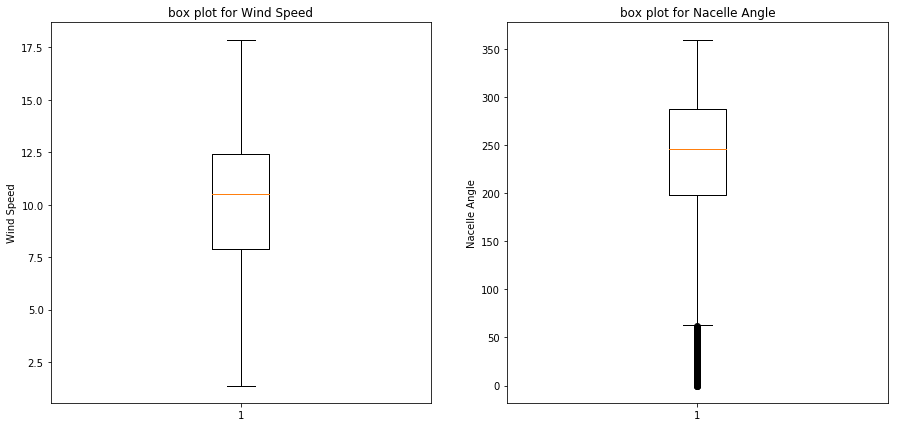

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
for i, j in enumerate(variables):
    axs[i].boxplot(data_base[j])
    axs[i].set_title('box plot for {}'.format(j))
    axs[i].set_ylabel(j)
plt.show()

#### 1.2 boxplot by machine

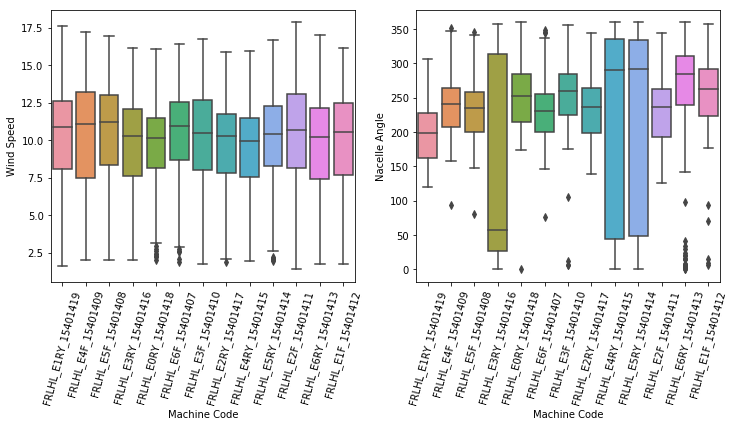

In [5]:
#box-plot by group
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, j in enumerate(variables):
    grap = sns.boxplot(x='Machine Code',y=j, data=data_base, ax=axs[i])
    grap.set_xticklabels(grap.get_xticklabels(), rotation=75)
plt.show()

#### 1.3 global histogram

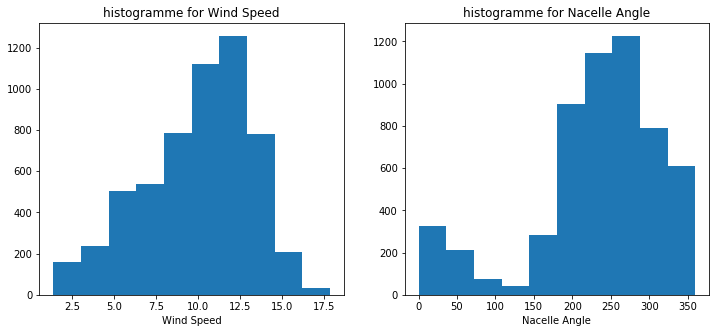

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2 ,figsize=(12, 5))
for i, j in enumerate(variables):
    axs[i].hist(data_base[j])
    axs[i].set_title('histogramme for {}'.format(j))
    axs[i].set_xlabel(j)
plt.show()

#### 1.4 histogram + density

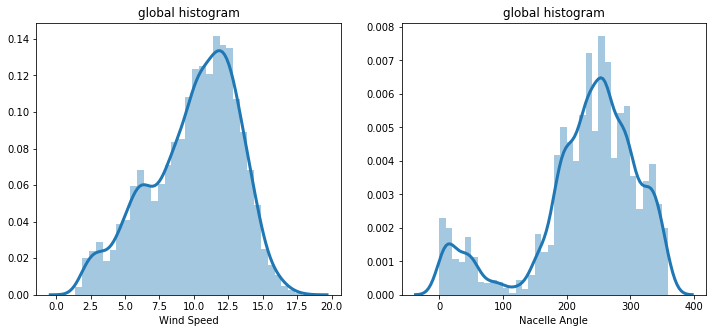

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, j in enumerate(variables):  
    grap = sns.distplot(data_base[j], hist=True, kde_kws = {'linewidth': 3}, ax = axs[i])   
    grap.set_title("global histogram")
plt.show()


#### 1.5 density by machine

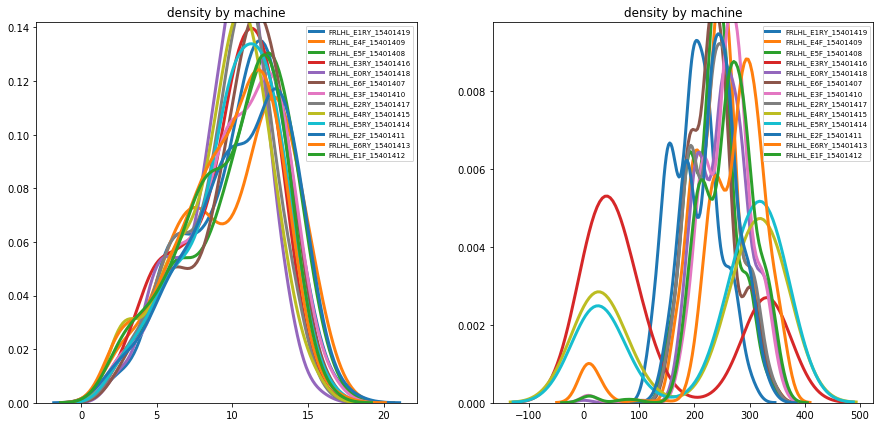

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

for k, i in enumerate(variables):
    for j in data_base['Machine Code'].unique():
        d = data_base.loc[data_base['Machine Code'] == j,[i]]
        if len(d.index)>1:
            grap = sns.distplot(d, hist = False, kde = True, kde_kws = {'linewidth': 3}, ax=axs[k], label = j)
    grap.set_title('density by machine')
    grap.legend(prop={'size': 7})
plt.show()



### 2 Multivariate Plots

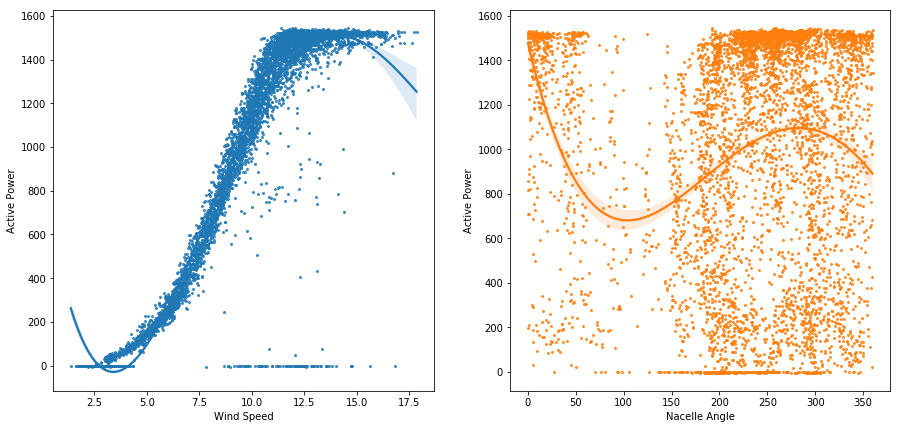

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
for k, i in enumerate(variables):
    grap = sns.regplot(x=i, y=target, scatter_kws={"s": 4}, order=4, truncate=True, data = data_base,ax=axs[k])
plt.show()

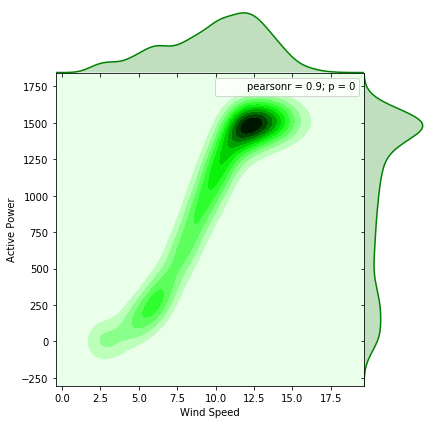

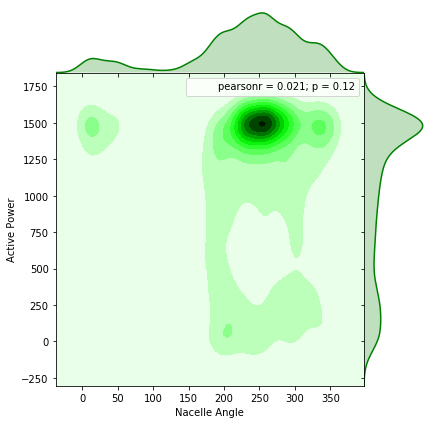

In [10]:
for k, i in enumerate(variables):
    grap = sns.jointplot(x=i, y=target, kind="kde", space=0, color="g", data = data_base)
    plt.show()


### 2 Time series plots

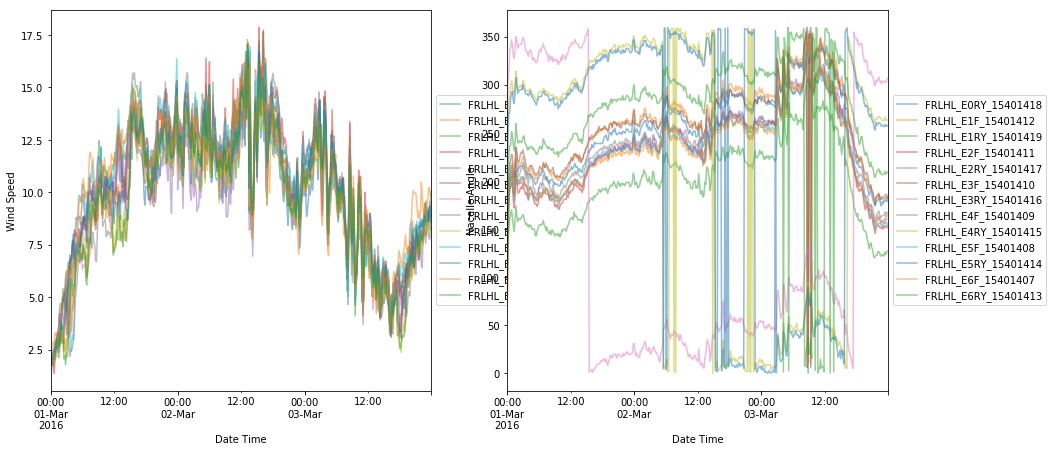

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
for i, j in enumerate(variables):
    df_transformed = pd.pivot_table(data=data_base, values = j, index = 'Date Time', columns= 'Machine Code')
    df_transformed.index = pd.to_datetime(df_transformed.index)
    df_transformed.plot(ax=axs[i],alpha=0.5, style='-')
    axs[i].set_ylabel(j)
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()